In [2]:
# In your notebook cell
import MakeDataset as md
import numpy as np
import matplotlib.pyplot as plt

# After importing, you can directly use the variables
X_train = md.X_train
y_train = md.y_train
X_test = md.X_test
y_test = md.y_test

print(X_train.shape, y_train.shape)


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
(126, 500, 3) (126,)


In [4]:
activity_map = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (126, 500, 3)
Test shape: (54, 500, 3)


### Question 1: 

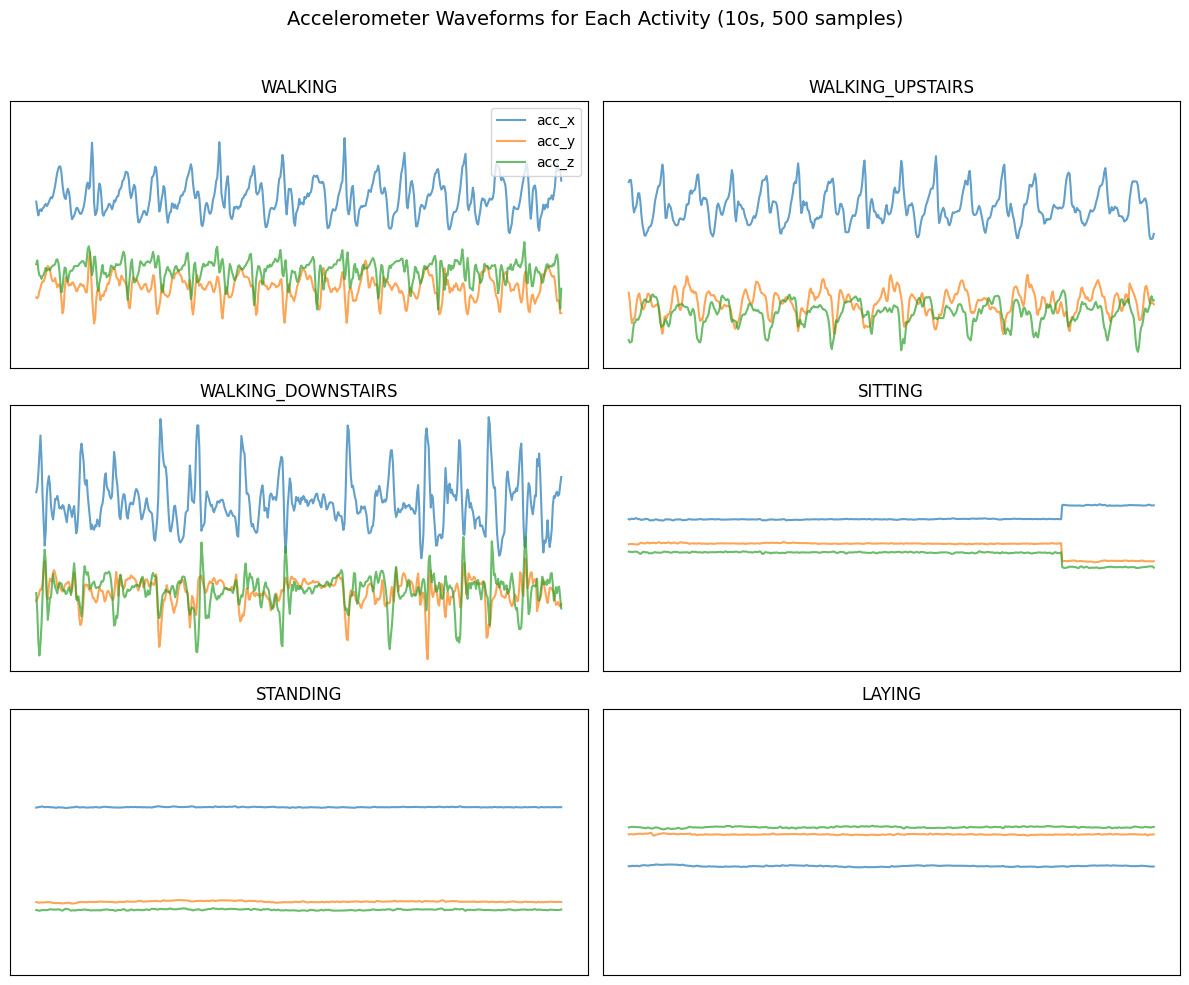

In [5]:
# Pick one sample per activity
samples = []
for act in range(1, 7):  # activities 1–6
    idx = np.where(y_train == act)[0][0]  # first sample index for this activity
    samples.append((X_train[idx], activity_map[act]))

# Plot in 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharey=True)

for i, (sample, label) in enumerate(samples):
    row, col = divmod(i, 2)   # get grid position
    axes[row, col].plot(sample[:,0], label="acc_x", alpha=0.7)
    axes[row, col].plot(sample[:,1], label="acc_y", alpha=0.7)
    axes[row, col].plot(sample[:,2], label="acc_z", alpha=0.7)
    axes[row, col].set_title(label)
    axes[row, col].set_xticks([])
    axes[row, col].set_yticks([])

# Add legend to the first subplot only
axes[0, 0].legend(loc="upper right")

plt.suptitle("Accelerometer Waveforms for Each Activity (10s, 500 samples)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # adjust spacing for the main title
plt.show()


### Observations
- **Dynamic activities (Walking, Walking Upstairs, Walking Downstairs)**:
  - Show periodic oscillations in the waveforms.
  - Walking Downstairs has larger peaks due to stronger impact forces.
  - Walking Upstairs has smaller, smoother oscillations.

- **Static activities (Sitting, Standing, Laying)**:
  - Signals are nearly flat (low variance).
  - Baseline values differ due to gravity projection (phone orientation).
    - Laying: acceleration mostly along one axis.
    - Sitting vs Standing: similar but slightly different baseline levels.

### Conclusion

- There is a **clear separation between dynamic and static activities**.  
  - Dynamic activities (walking, walking upstairs, walking downstairs) exhibit **periodic oscillations** across the axes due to repetitive body motion.  
  - Static activities (sitting, standing, laying) produce **flat, low-variance signals** dominated by gravity.  
  - As a result, distinguishing static vs. dynamic is relatively straightforward.  

- **Finer distinctions are more challenging.**  
  - Among dynamics, upstairs and downstairs show similar oscillations, differing mostly in amplitude and rhythm.  
  - Among statics, sitting, standing, and laying appear nearly constant, differing mainly in **baseline values** set by phone orientation relative to gravity.  

- Thus, while **basic separation (static vs. dynamic)** can be achieved with simple rules, **detailed classification** requires machine learning models that can capture subtle differences in amplitude, frequency, and baseline shifts.  

### Question 2

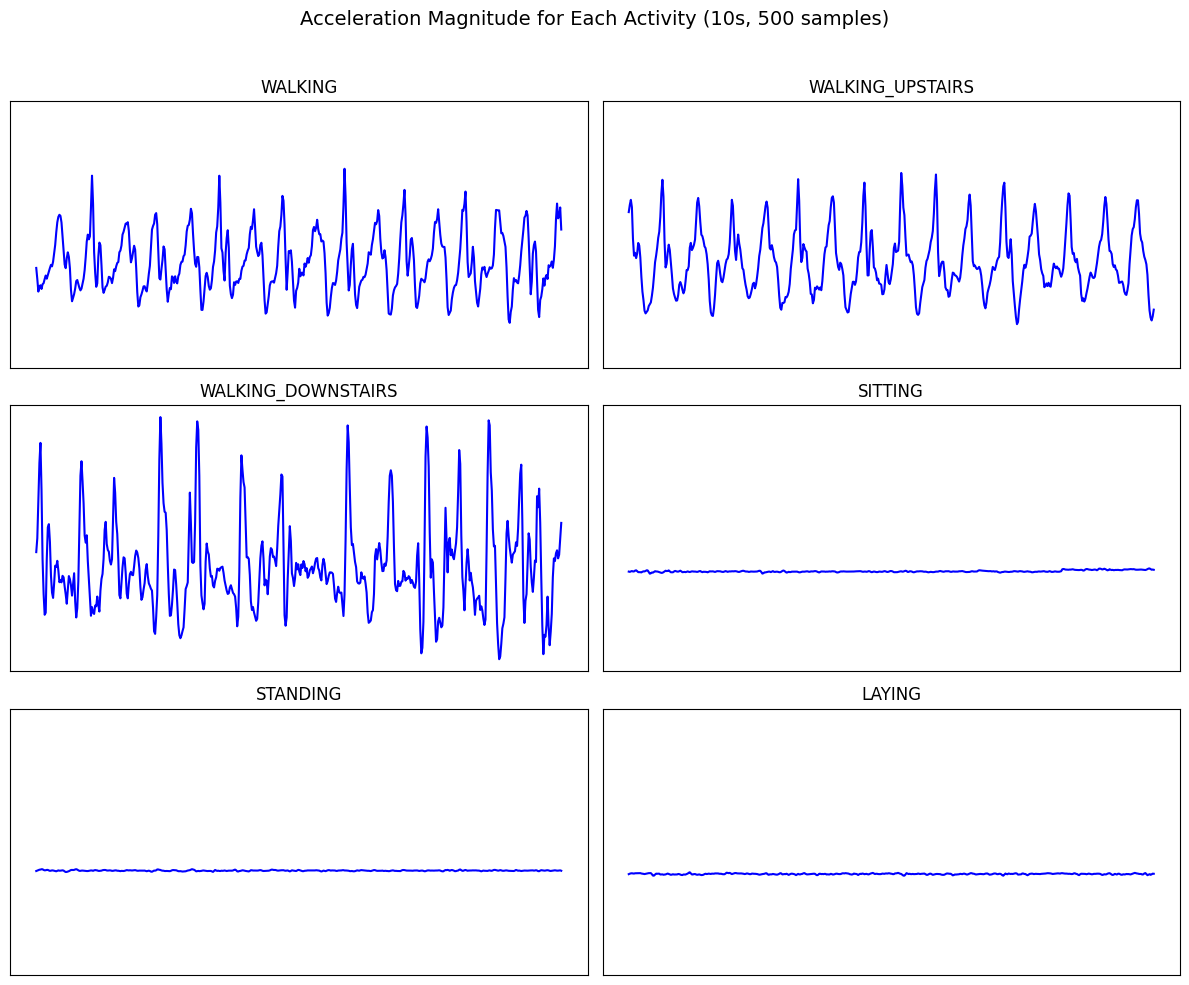

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute linear acceleration magnitude
def compute_magnitude(sample):
    return np.sqrt(sample[:,0]**2 + sample[:,1]**2 + sample[:,2]**2)

# Pick one sample from each activity again
samples = []
for act in range(1, 7):
    idx = np.where(y_train == act)[0][0]
    samples.append((compute_magnitude(X_train[idx]), activity_map[act]))

# Plot in 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharey=True)

for i, (mag, label) in enumerate(samples):
    row, col = divmod(i, 2)
    axes[row, col].plot(mag, color="blue")
    axes[row, col].set_title(label)
    axes[row, col].set_xticks([])
    axes[row, col].set_yticks([])

plt.suptitle("Acceleration Magnitude for Each Activity (10s, 500 samples)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Conclusion

- The **acceleration magnitude** clearly separates static vs dynamic activities.  
  - Dynamic activities show **large, periodic fluctuations** in magnitude.  
  - Static activities show **almost constant magnitude** with only small variations.  

- Therefore, a **machine learning model is not strictly necessary** to distinguish between static and dynamic classes.  
- However, ML is required to separate **within static (sitting, standing, laying)** and **within dynamic (walking, upstairs, downstairs)** because the differences are more subtle and cannot be captured by magnitude alone.  


### Question 3

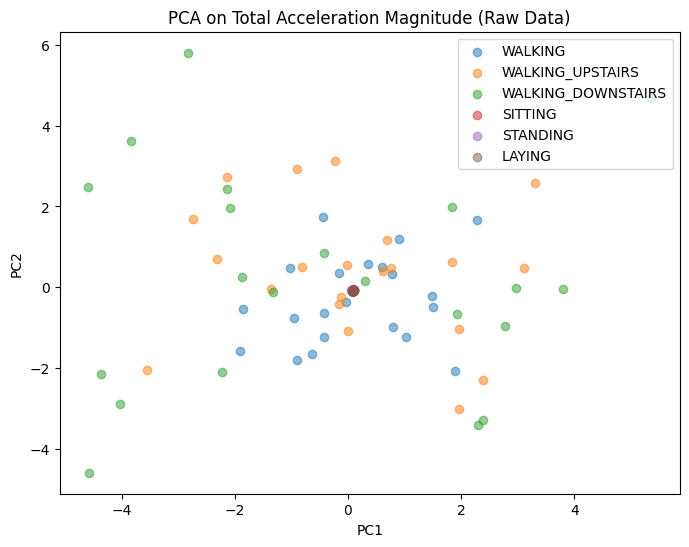

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Compute magnitude for all samples
X_mag = np.sqrt(np.sum(X_train**2, axis=2))  # shape: (n_samples, 500)

# PCA reduction
pca = PCA(n_components=2)
X_mag_pca = pca.fit_transform(X_mag)

# Scatter plot
plt.figure(figsize=(8,6))
for act in np.unique(y_train):
    idx = np.where(y_train == act)[0]
    plt.scatter(X_mag_pca[idx,0], X_mag_pca[idx,1], label=activity_map[act], alpha=0.5)

plt.title("PCA on Total Acceleration Magnitude (Raw Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


In [8]:
pip install tsfel


C:\Users\kanda\AppData\Local\Temp\ipykernel_7124\4069475784.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg_time, df, verbose=0)
C:\Users\kanda\AppData\Local\Temp\ipykernel_7124\4069475784.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg_time, df, verbose=0)
C:\Users\kanda\AppData\Local\Temp\ipykernel_7124\4069475784.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg_time, df, verbose=0)
C:\Users\kanda\AppData\Local\Temp\ipykernel_7124\4069475784.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg_time, df, verbose=0)
C:\Users\kanda\AppData\Local\Temp\ipykernel_7124\4069475784.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = ts

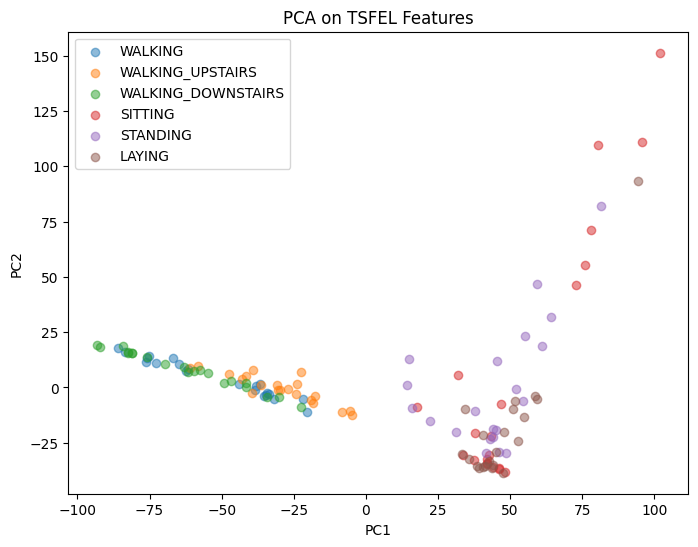

In [10]:
import tsfel
import pandas as pd

# Get default TSFEL feature configuration
cfg = tsfel.get_features_by_domain()

# To save time, select only time-domain features (avoid huge computations)
cfg_time = tsfel.get_features_by_domain("temporal")

# Extract features from all samples
X_tsfel = []
for sample in X_train:
    df = pd.DataFrame(sample, columns=["accx","accy","accz"])
    feats = tsfel.time_series_features_extractor(cfg_time, df, verbose=0)
    X_tsfel.append(feats.values.flatten())

X_tsfel = np.array(X_tsfel)

# PCA reduction
pca = PCA(n_components=2)
X_tsfel_pca = pca.fit_transform(X_tsfel)

# Scatter plot
plt.figure(figsize=(8,6))
for act in np.unique(y_train):
    idx = np.where(y_train == act)[0]
    plt.scatter(X_tsfel_pca[idx,0], X_tsfel_pca[idx,1], label=activity_map[act], alpha=0.5)

plt.title("PCA on TSFEL Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


C:\Users\kanda\AppData\Local\Temp\ipykernel_7124\665670499.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  uci_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
C:\Users\kanda\AppData\Local\Temp\ipykernel_7124\665670499.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  uci_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
C:\Users\kanda\AppData\Local\Temp\ipykernel_7124\665670499.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pd.read_csv("./UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None).values.flatten(),
C:\Users\kanda\AppData\Local\Temp\ipykernel_7124\665670499.py:8: FutureWa

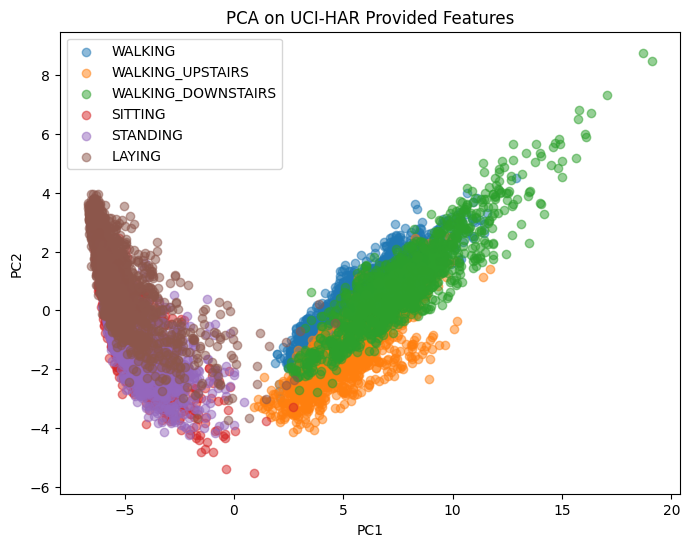

In [11]:
# Load provided features (561-dim)
uci_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
uci_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
X_uci = pd.concat([uci_train, uci_test]).values

y_train_full = np.concatenate([ 
    pd.read_csv("./UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None).values.flatten(),
    pd.read_csv("./UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None).values.flatten()
])

# PCA reduction
pca = PCA(n_components=2)
X_uci_pca = pca.fit_transform(X_uci)

# Scatter plot
plt.figure(figsize=(8,6))
for act in np.unique(y_train_full):
    idx = np.where(y_train_full == act)[0]
    plt.scatter(X_uci_pca[idx,0], X_uci_pca[idx,1], label=activity_map[act], alpha=0.5)

plt.title("PCA on UCI-HAR Provided Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


### Question 4

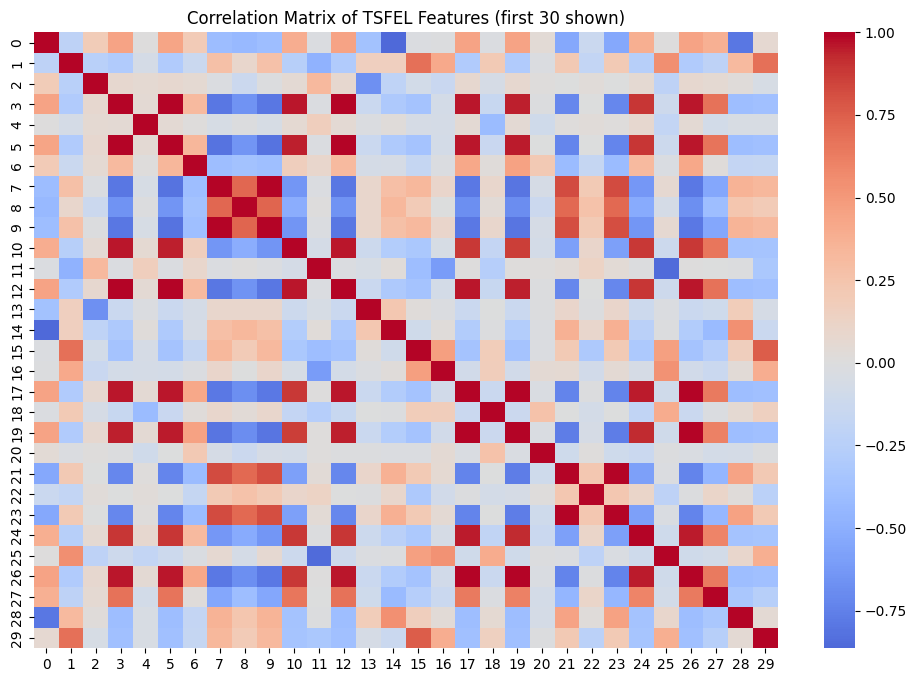

In [12]:
import seaborn as sns

# Compute correlation matrix
corr_tsfel = pd.DataFrame(X_tsfel).corr()

# Plot heatmap (optional: only first 30 features for clarity)
plt.figure(figsize=(12,8))
sns.heatmap(corr_tsfel.iloc[:30,:30], cmap="coolwarm", center=0)
plt.title("Correlation Matrix of TSFEL Features (first 30 shown)")
plt.show()


In [13]:
# Identify highly correlated pairs
threshold = 0.9
corr_pairs = (
    corr_tsfel.where(np.triu(np.ones(corr_tsfel.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]
high_corr = corr_pairs[corr_pairs["Correlation"].abs() > threshold]
print("Highly correlated TSFEL features:\n", high_corr)


Highly correlated TSFEL features:
      Feature1  Feature2  Correlation
121         3         5     0.993984
126         3        10     0.961618
128         3        12     1.000000
133         3        17     0.959800
135         3        19     0.948038
142         3        26     0.959800
147         3        31     0.920131
149         3        33     0.928433
156         3        40     0.920131
199         5        10     0.946974
201         5        12     0.993984
206         5        17     0.961105
208         5        19     0.952969
215         5        26     0.961105
220         5        31     0.911212
222         5        33     0.922466
229         5        40     0.911212
267         7         9     0.999189
366        10        12     0.961618
430        12        17     0.959800
432        12        19     0.948038
439        12        26     0.959800
444        12        31     0.920131
446        12        33     0.928433
453        12        40     0.920131
562

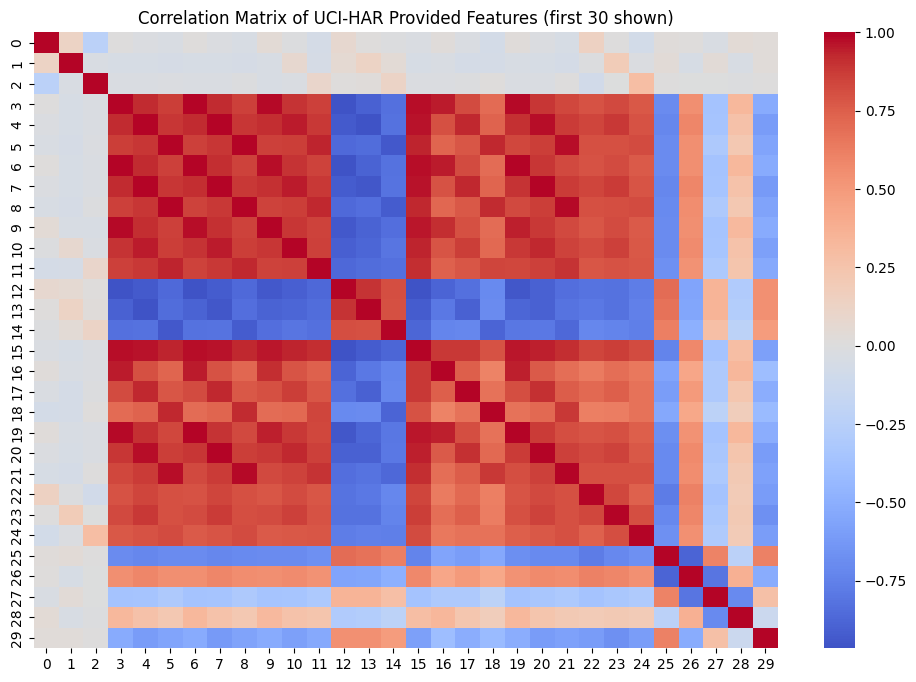

Highly correlated UCI features:
         Feature1  Feature2  Correlation
1677           3         4     0.922525
1679           3         6     0.998662
1680           3         7     0.916087
1682           3         9     0.981226
1685           3        12    -0.965073
...          ...       ...          ...
156931       543       548     0.981132
156945       544       546     0.954118
156947       544       548     0.927989
156976       546       548     0.981439
157044       552       553     0.967696

[8093 rows x 3 columns]


In [14]:
uci_df = pd.DataFrame(X_uci)  # X_uci from earlier
corr_uci = uci_df.corr()

# Plot subset heatmap (first 30 features)
plt.figure(figsize=(12,8))
sns.heatmap(corr_uci.iloc[:30,:30], cmap="coolwarm", center=0)
plt.title("Correlation Matrix of UCI-HAR Provided Features (first 30 shown)")
plt.show()

# Identify highly correlated pairs
corr_pairs_uci = (
    corr_uci.where(np.triu(np.ones(corr_uci.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs_uci.columns = ["Feature1", "Feature2", "Correlation"]
high_corr_uci = corr_pairs_uci[corr_pairs_uci["Correlation"].abs() > threshold]
print("Highly correlated UCI features:\n", high_corr_uci)


### Correlation Analysis of Features

- **TSFEL Features:**
  - Many features are highly correlated (correlation > 0.9).  
  - For example, statistical descriptors like *mean*, *median*, and *energy* often move together.  
  - This indicates **redundant features**, which may not contribute much new information.  

- **UCI-HAR Features:**
  - As expected, a large number of features are correlated, especially frequency-domain ones (e.g., multiple FFT bands) and time-domain statistics.  
  - This redundancy arises from engineered features describing the same underlying motion.  

### Conclusion
- Both TSFEL and UCI feature sets contain **redundant features**.  
- High correlation can cause inefficiency in models (overfitting, longer training).  
- Dimensionality reduction techniques (PCA, feature selection, or regularization) are useful to remove redundancy and improve model performance.  
